In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig

import seaborn as sns
import scipy.io

sns.set(style="ticks", context="talk", palette="pastel")
plt.style.use('dark_background')

In [2]:
pca2 = np.loadtxt('pca2.csv', skiprows=1, delimiter=',').T

pca2_centered = pca2 - np.mean(pca2, axis=1).reshape((-1, 1))
pca2_cov = np.cov(pca2_centered)

pca2_eval, pca2_evec = eig(pca2_cov)

pca2_transformed = pca2_evec.T @ pca2_centered 

In [3]:
pca2_preprocessed = np.delete(pca2, [16, 156], axis=1)

pca2_centered = pca2_preprocessed - np.mean(pca2_preprocessed, axis=1).reshape((-1, 1))
pca2_cov = np.cov(pca2_centered)

pca2_eval_pre, pca2_evec_pre = eig(pca2_cov)

pca2_transformed_preprocessed = pca2_evec_pre.T @ pca2_centered 

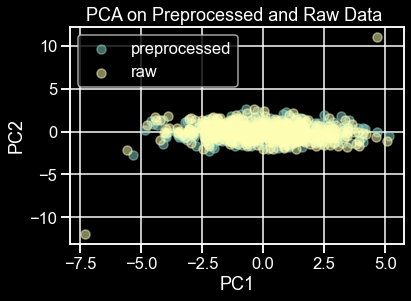

In [4]:

plt.scatter(pca2_transformed_preprocessed[0, :],pca2_transformed_preprocessed[1,:], alpha=0.5, label='preprocessed')
plt.scatter(pca2_transformed[0, :],pca2_transformed[1,:], alpha=0.5, label='raw')
plt.title('PCA on Preprocessed and Raw Data ')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

Discussion:

The 'outliers' significantly change the direction of the principal components because PCA tries to capture variance as much as possible. 

# EX 2

In [5]:
data_2 = np.loadtxt('pca4.csv',skiprows=1, delimiter=',')

a = np.where(data_2>6)[0]
b = np.where(data_2<-6)[0]

outliers = np.concatenate((a,b))

filtered = data_2.copy()

filtered = np.delete(filtered, outliers, axis=0)

In [6]:
centered = filtered - np.mean(filtered, axis=0)

In [7]:
cov = np.cov(centered.T)
print(cov.shape)
e_val, e_vec = np.linalg.eig(cov)

(4, 4)


In [8]:
e_vec

array([[-6.68104504e-01, -7.44055712e-01, -4.17917429e-03,
        -6.26106300e-05],
       [-7.44049527e-01,  6.68077013e-01,  3.80086963e-03,
         6.99713062e-03],
       [ 5.09285464e-03, -3.76143205e-03, -1.59278874e-01,
         9.87213328e-01],
       [ 8.58062441e-04, -6.32882723e-03,  9.87217468e-01,
         1.59251001e-01]])

EX 4

In [155]:
import matplotlib.cm as cm

In [156]:
def oja_rule_implementation(ini_w, epl, data):
    ws = []
    w = ini_w.copy()
    for i in range(len(data)):
        x = data[[i],:].T
        y = w.T @ x
        del_w = epl* y*(x -  y*w)
        w += del_w
        ws.append(w.copy())
    return np.array(ws).reshape(data.shape)

In [157]:
# data = pd.read_csv('data-onlinePCA.txt')
data = np.loadtxt('data-onlinePCA.txt', skiprows =1, delimiter=',', usecols=(1,2) )
t_max = 10
dt = t_max/len(data)
t = np.arange(0,t_max,dt)

In [158]:
epsilons = [0.002, 0.04, 0.45]

init_w = np.random.normal(size=(2,1))
init_w = init_w/np.linalg.norm(init_w)
ws = []
for eps in epsilons:
    ws.append(oja_rule_implementation(init_w, eps, data))

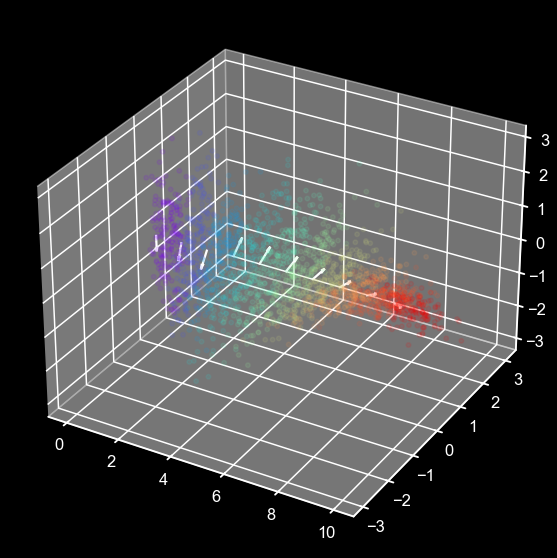

In [159]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
colors = cm.rainbow(np.linspace(0, 1, 10))

for i in range(10) :
    start = int(i/dt)
    end = int((i+1)/dt)
    data_block = data[start:end, :]
    ax.scatter(t[start:end], data[start:end,0], data[start:end,1], color=colors[i], alpha=0.1)
    centred_data_block= data_block - data_block.mean(axis=0)
    covariance = np.cov(centred_data_block.T)
    eigen_value, eigen_vector = np.linalg.eig(covariance)
    order = np.argsort(-1*eigen_value)
    
    eigen_vector_sorted = eigen_vector[:,order]
    
    ax.quiver(t[start+4],0, 0, 0, eigen_vector_sorted[0,0], eigen_vector_sorted[1,0],length = 0.5, normalize = True)

# ax.plot(t, ws[0][:,0], ws[0][:,1], label= str(epsilons[0]))
# ax.plot(t, ws[1][:,0], ws[0][:,1], label= str(epsilons[1]))

# ax.plot(t, ws[2][:,0], ws[0][:,1], label= str(epsilons[2]))
plt.show()

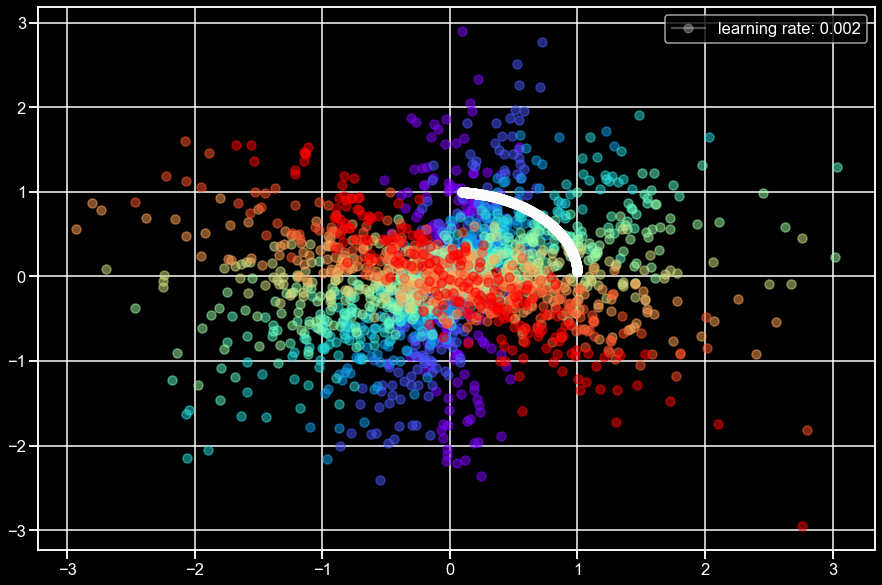

In [160]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for i in range(10) :
    start = int(i/dt)
    end = int((i+1)/dt)
    data_block = data[start:end, :]
    ax.scatter(data[start:end,0], data[start:end,1], color=colors[i], alpha=0.5)

#alphas = np.linspace(0,1,data.shape[0])


ax.plot(ws[0][:,0], ws[0][:,1], color='white', marker='o', label = 'learning rate: {}'.format(epsilons[0]), alpha=0.3)
ax.legend()
ax.grid();

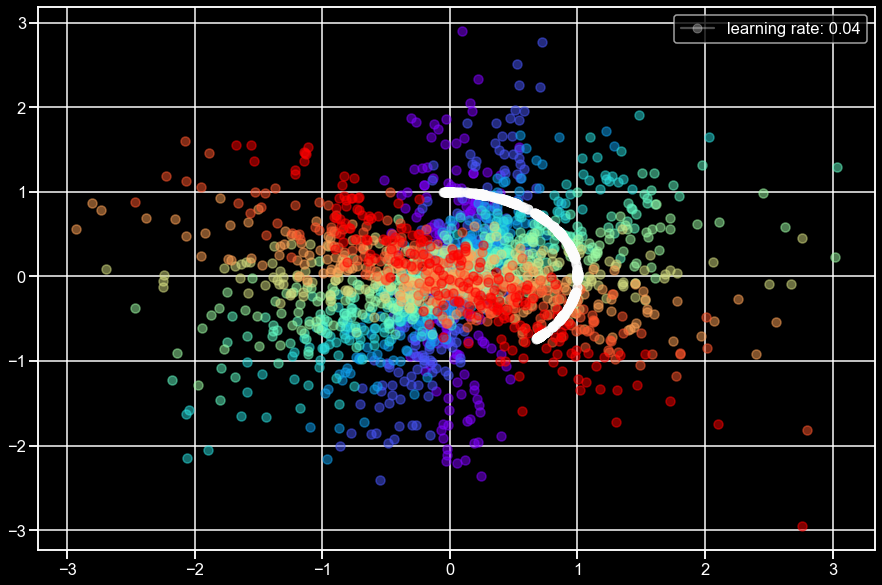

In [161]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for i in range(10) :
    start = int(i/dt)
    end = int((i+1)/dt)
    data_block = data[start:end, :]
    ax.scatter(data[start:end,0], data[start:end,1], color=colors[i], alpha=0.5)

#alphas = np.linspace(0,1,data.shape[0])


ax.plot(ws[1][:,0], ws[1][:,1], color='white', marker='o', label = 'learning rate: {}'.format(epsilons[1]), alpha=0.3)
ax.legend()
ax.grid();

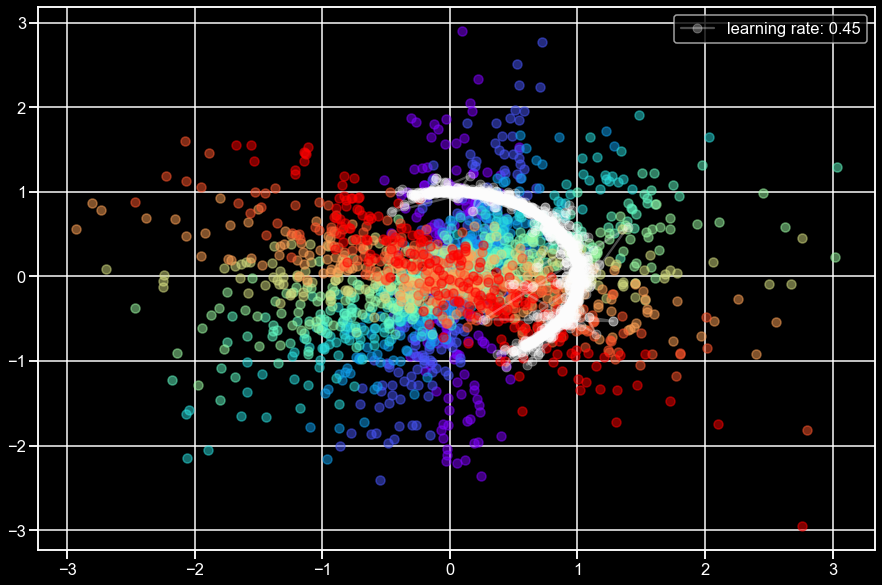

In [162]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for i in range(10) :
    start = int(i/dt)
    end = int((i+1)/dt)
    data_block = data[start:end, :]
    ax.scatter(data[start:end,0], data[start:end,1], color=colors[i], alpha=0.5)


ax.plot(ws[2][:,0], ws[2][:,1], color='white', marker='o', label = 'learning rate: {}'.format(epsilons[2]), alpha=0.3)
ax.legend()
ax.grid();